In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.dates as mdates
from math import ceil, floor

In [ ]:
df=pd.read_csv('compfest56.csv',delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tanggal                          500 non-null    object 
 1   Meninggal (Indonesia)            500 non-null    int64  
 2   Sembuh (Indonesia)               500 non-null    int64  
 3   Dirawat (Indonesia)              500 non-null    int64  
 4   Positif (Indonesia)              500 non-null    int64  
 5   Meninggal (Jakarta)              500 non-null    int64  
 6   Sembuh (Jakarta)                 500 non-null    int64  
 7   Self-Isolation (Jakarta)         500 non-null    int64  
 8   Dirawat (Jakarta)                500 non-null    int64  
 9   Positif (Jakarta)                500 non-null    int64  
 10  Positif Aktif (Jakarta)          500 non-null    int64  
 11  Meninggal Harian (Indonesia)     500 non-null    int64  
 12  Sembuh Harian (Indones

In [ ]:
df.describe()

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),vaksinasi 1 total,vaksinasi 2 total,vaksinasi 1 harian,vaksinasi 2 harian,persentase full vaksin,Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Unnamed: 26
count,500.000000,5.000000e+02,500.000000,5.000000e+02,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0
mean,20617.126000,6.174448e+05,79307.998000,7.173699e+05,3143.072000,162773.85400,7968.400000,3856.596000,177741.922000,11824.996000,136.438000,4279.202000,815.41800,5231.058000,3.939664e+06,2.115841e+06,6.796281e+04,27848.022000,0.781084,19.100000,1178.972000,143.696000,36.736000,1378.486000,180.432000,NaN
std,19051.514963,6.475310e+05,67226.340474,7.216135e+05,2728.124864,167405.55207,11109.473759,4448.687168,178593.530143,15264.004748,136.451207,4222.635973,2919.12528,6133.624534,7.934662e+06,4.132638e+06,1.744291e+05,60657.922167,1.527524,19.607624,1943.487192,813.999308,494.886172,2078.542389,1109.752957,NaN
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5926.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-3561.000000,-4253.000000,0.000000,-7475.000000,NaN
25%,3075.750000,2.805625e+04,30648.250000,6.178025e+04,649.500000,7310.00000,2998.250000,1865.500000,11985.250000,4498.500000,53.750000,882.500000,-113.25000,1371.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,6.000000,159.750000,-83.250000,-70.000000,214.500000,-74.750000,NaN
50%,14395.000000,3.589235e+05,63477.500000,4.276850e+05,2339.500000,99318.00000,5010.500000,2833.000000,109747.000000,7785.500000,108.500000,3843.000000,271.00000,4175.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,15.000000,851.500000,33.500000,20.000000,886.000000,54.000000,NaN
75%,37961.250000,1.218476e+06,111038.000000,1.399864e+06,5928.000000,341625.00000,8900.750000,4383.500000,354553.500000,12904.000000,177.000000,6084.500000,851.25000,6298.000000,3.603404e+06,1.261270e+06,3.652500e+02,173.750000,0.466101,23.000000,1302.500000,210.000000,129.000000,1437.750000,233.250000,NaN
max,68219.000000,2.139601e+06,407709.000000,2.615529e+06,9541.000000,589486.00000,73239.000000,30418.000000,689243.000000,102082.000000,1040.000000,34754.000000,26912.00000,47899.000000,3.639502e+07,1.503855e+07,1.397304e+06,321179.000000,5.557483,196.000000,20570.000000,5267.000000,2262.000000,14619.000000,7529.000000,NaN


In [ ]:
df['persentase full vaksin']=df['persentase full vaksin'].astype(float)
df['Tanggal_now'] = df['Tanggal'].astype(str)
df = df.set_index('Tanggal_now')

# convert Date back to datetime format
date_timestamp_format = df['Tanggal'].apply(datetime.strptime, args = ['%m/%d/%Y'])
df['Tanggal'] = date_timestamp_format

df.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),vaksinasi 1 total,vaksinasi 2 total,vaksinasi 1 harian,vaksinasi 2 harian,persentase full vaksin,Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Unnamed: 26
Tanggal_now,,,,,,,,,,,,,,,,,,,,,,,,,,,
03/01/2020,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,NaN
03/02/2020,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0.0,0,0,0,0,0,0,NaN
03/03/2020,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0.0,1,0,0,2,3,2,NaN
03/04/2020,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,NaN
03/05/2020,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,0,0,0,0,0.0,2,0,0,2,4,2,NaN


In [ ]:
date_c = df.groupby(['Tanggal'])[['Positif (Indonesia)','Meninggal (Indonesia)','Sembuh (Indonesia)']].apply(sum).reset_index()


from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Positif (Indonesia)','Meninggal (Indonesia)','Sembuh (Indonesia)'))

trace1 = go.Scatter(
                x=date_c['Tanggal'],
                y=date_c['Positif (Indonesia)'],
                name="Positif (Indonesia)",
                line_color='orange',
                mode='lines+markers',
                opacity=0.8)
trace2 = go.Scatter(
                x=date_c['Tanggal'],
                y=date_c['Meninggal (Indonesia)'],
                name="Meninggal (Indonesia)",
                line_color='red',
                mode='lines+markers',
                opacity=0.8)

trace3 = go.Scatter(
                x=date_c['Tanggal'],
                y=date_c['Sembuh (Indonesia)'],
                name="Sembuh (Indonesia)",
                mode='lines+markers',
                line_color='green',
                opacity=0.8)



fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.update_layout(template="plotly_dark",title_text = '<b>Indonesia Spread of the Coronavirus Over Time </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()


In [ ]:
# use np.convolve to generate rolling averages 
y = df['vaksinasi 2 harian'].iloc[360:]
x = df['Tanggal'].iloc[360:]
y2 =df['vaksinasi 1 harian'].iloc[360:]

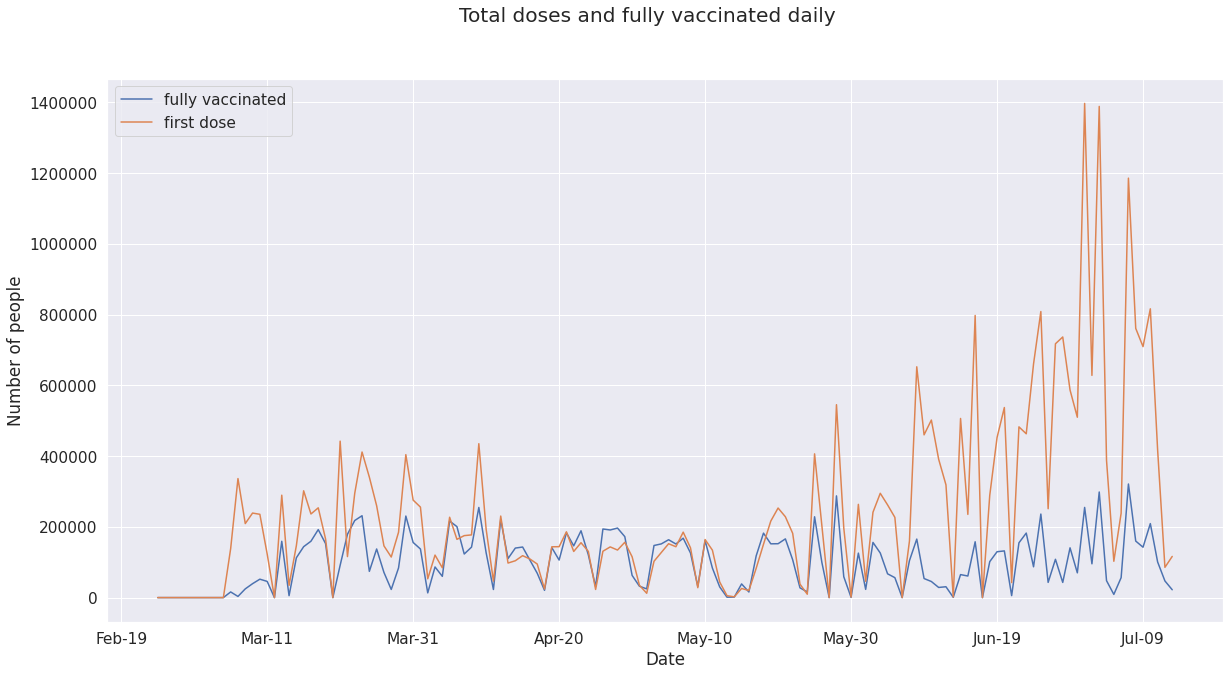

In [ ]:
import matplotlib.dates as mdates
import matplotlib
import matplotlib.pyplot as plt
# adjust font size
sns.set(font_scale = 1.4)

# ploting the x and y axis
plt.plot(x, y, label = 'fully vaccinated')
plt.plot(x, y2, label = 'first dose')

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)

# groom the graph
plt.legend()
plt.gcf().set_size_inches(20,10)
plt.suptitle('Total doses and fully vaccinated daily')
plt.xlabel('Date')
plt.ylabel('Number of people')

# adjust ticks for legibility
plt.ticklabel_format(axis='y', style='plain')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

In [ ]:
import numpy as np 

# use np.convolve to generate rolling averages 
y = np.convolve(df['vaksinasi 2 harian'].iloc[360:], np.ones(7), 'valid') / 7
x = df['Tanggal'].iloc[366:]
y2 = np.convolve(df['vaksinasi 1 harian'].iloc[360:], np.ones(7), 'valid') / 7

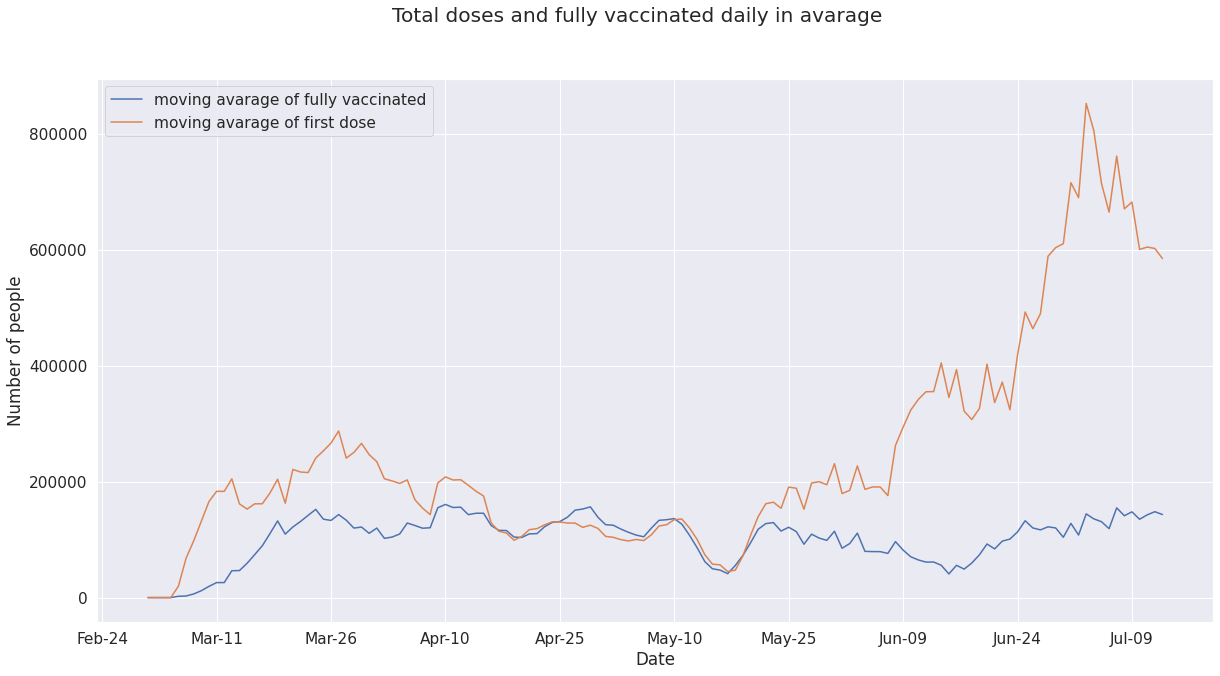

In [ ]:
import matplotlib.dates as mdates
import matplotlib
import matplotlib.pyplot as plt
# adjust font size
sns.set(font_scale = 1.4)

# ploting the x and y axis
plt.plot(x, y, label = 'moving avarage of fully vaccinated')
plt.plot(x, y2, label = 'moving avarage of first dose')

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)

# groom the graph
plt.legend()
plt.gcf().set_size_inches(20,10)
plt.suptitle('Total doses and fully vaccinated daily in avarage')
plt.xlabel('Date')
plt.ylabel('Number of people')

# adjust ticks for legibility
plt.ticklabel_format(axis='y', style='plain')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

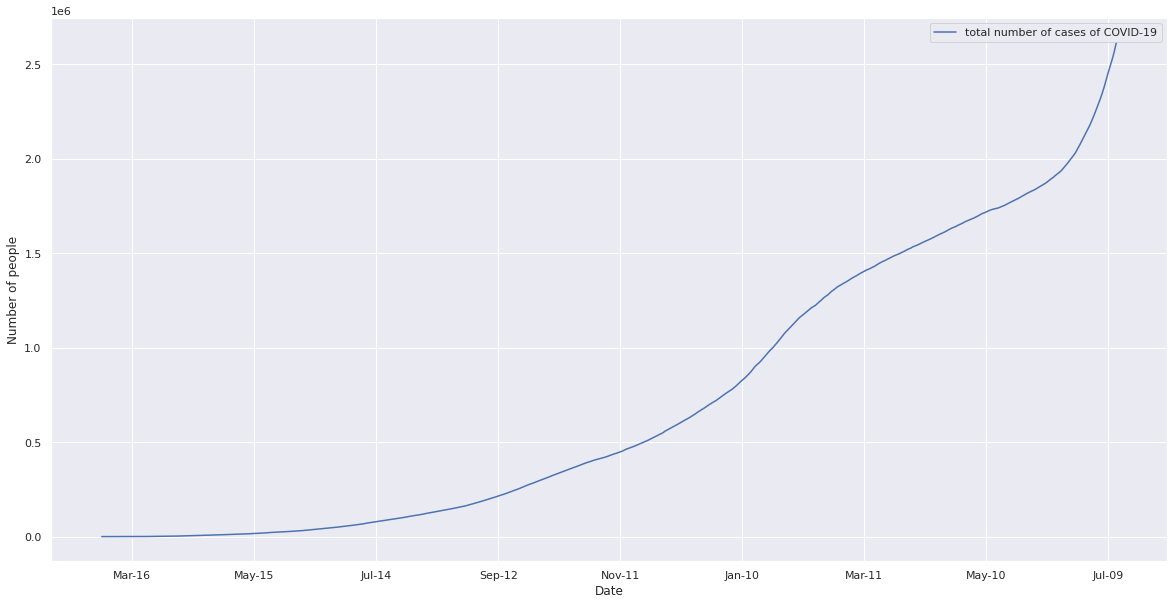

In [ ]:
sns.set()

# ploting the x and y axis 
plt.plot(df['Tanggal'], df['Positif (Indonesia)'], label='total number of cases of COVID-19')


# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)

# groom graph
plt.legend()
plt.gcf().set_size_inches(20,10)
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

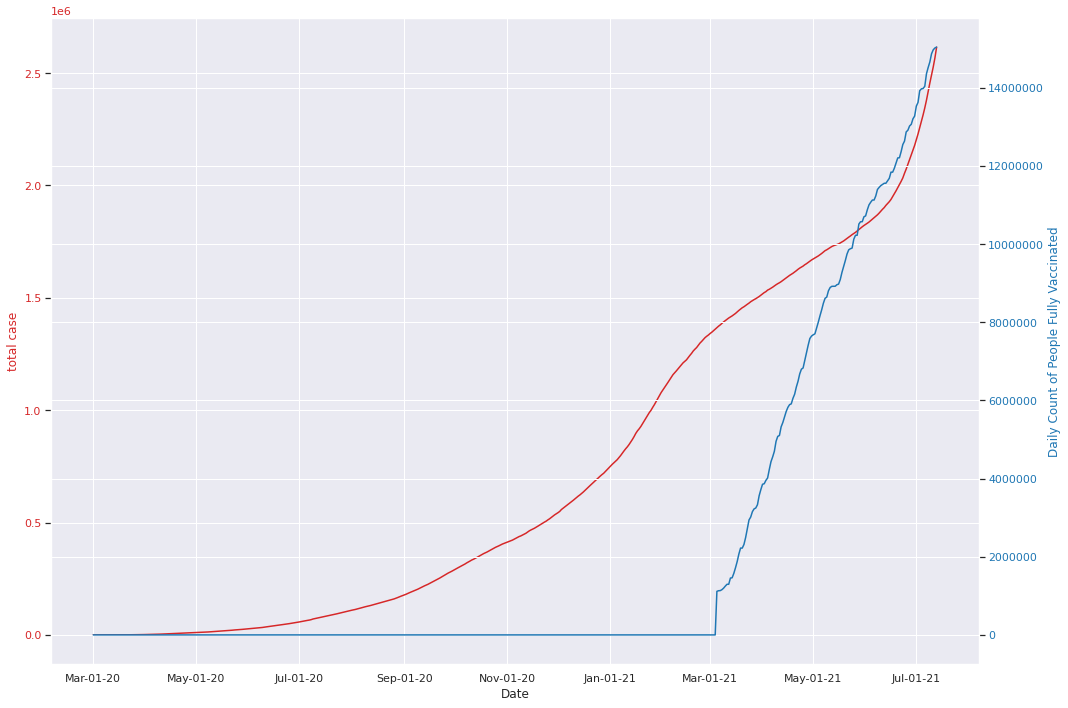

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('total case', color=color)
ax1.plot(df['Tanggal'], df['Positif (Indonesia)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Daily Count of People Fully Vaccinated', color=color) 
ax2.plot(df['Tanggal'], df['vaksinasi 2 total'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# reformat the y axis to be in plain numbers instead of scientific notation
plt.ticklabel_format(axis='y', style='plain')

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d-%y')
plt.gca().xaxis.set_major_formatter(my_fmt)

# reformat the y axis to be in plain numbers instead of scientific notation
plt.ticklabel_format(axis='y', style='plain')


fig.tight_layout() 
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


def crossval_poly_reg(x, y, degree = 2, shuffle = True, splits = 10): 
    """ fit a cross-validated linear regression model to the given data in exponential form; plot the result 
    
        Args: 
            x (array): an array containing the x values 
            y (array): an array containing the y values
            degree (int): the degree polynomial that should be modeled 
            shuffle (boolean): whether or not the data should be shuffled in the kfold
            splits (int): the number of splits for the kfold
            
        Returns: 
            y_pred (array): the predicted y values 
            crossval_r2 (float): the cross-validated r2 value
    """
    
    # project data to a polynomial model of the given degree
    poly_project = PolynomialFeatures(degree=degree)
    x_poly = poly_project.fit_transform(x)
    
    # initialize a k fold and linear regression
    kfold = KFold(n_splits = splits, shuffle = shuffle)
    reg = LinearRegression(fit_intercept=False)

    # initialize an empty array for y_pred 
    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(x_poly, y): 
        # split data into train and test data
        x_poly_test = x_poly[test_idx, :]
        x_poly_train = x_poly[train_idx, :]
        y_train = y[train_idx]

        # fit the linear model to the training data
        reg.fit(x_poly_train, y_train)

        # predict y 
        y_pred[test_idx] = reg.predict(x_poly_test)

    # compute the cross validated r2
    crossval_r2 = r2_score(y_true=y, y_pred=y_pred)
    
    return y_pred, crossval_r2

In [ ]:
def test_poly_degrees(x, y,  xlabel, ylabel, title, max_degree = 10): 
    """ Runs crossvalidated polynomial models for different degrees and returns a plotted result
    
        Args: 
            x (array): the x data 
            y (array): the y data 
            xlabel (string): the name of the x axis
            ylabel (string): the name of the y axis
            title (string): the title of the figure and the name of the pdf
            shuffle (Boolean): whether or not the data should be shuffled in the kfold for crossvalidation
            
        Returns: 
            r2_dict_list (list): a list containing information about the r2 for each degree
    """
    
    # set number of plots vertically
    vert_plots = int(np.ceil(max_degree/2)+1)
    
    # initalize subplot
    fig, axs = plt.subplots(vert_plots, 2)

    # track r2 values 
    r2_dict_list = []

    # test polynomial models up to the max degree
    for degree in range(max_degree+1): 

        # get the cross-validated y_pred and r2 for this degree
        y_pred, crossval_r2 = crossval_poly_reg(x, y, degree = degree)

        # track the r2 per degree
        r2_dict = {'degree':degree, 
                   'r2 per degree': crossval_r2/degree}
        r2_dict_list.append(r2_dict)

        # get subplot index 
        subplt_x = degree%2
        subplt_y = int(np.floor(degree/2))

        # plot the true and predicted values for this model
        axs[subplt_y, subplt_x].plot(x, y, label = 'true')
        axs[subplt_y, subplt_x].plot(x, y_pred, label = 'predicted')

        # format the plot
        axs[subplt_y, subplt_x].set_title(f'Degree {degree}, r2 = {crossval_r2:.3f}')
        axs[subplt_y, subplt_x].legend()

    # add axis labels 
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)

    # access and plot r2 per degree information
    r2_df = pd.DataFrame(r2_dict_list)
    axs[vert_plots-1, 1].plot(r2_df['degree'], r2_df['r2 per degree'])
    plt.xlabel('degree')
    plt.ylabel('r2 per degree')
    axs[vert_plots-1,1].set_title('R2 per degree')

    # format the whole figure 
    plt.gcf().set_size_inches(10, 1.5*max_degree)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.4)
    plt.suptitle(title)
    
    # save as a pdf 
 
    return r2_dict_list

In [ ]:
# slice df to keep data from  1, 2021 on (when vaccinations are increasing)
post_vak_df = df.iloc[370:, :]

# add a column to the dataframe that counts the days since Jan 1, 2021
days = np.empty_like(post_vak_df.index)
days.fill(1)
days_since_jan = np.cumsum(days)
post_vak_df['Days since start'] = days_since_jan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
post_vak_df

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),vaksinasi 1 total,vaksinasi 2 total,vaksinasi 1 harian,vaksinasi 2 harian,persentase full vaksin,Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Unnamed: 26,Days since start
Tanggal_now,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3/6/2021,2021-03-06,37154,1189510,147172,1373836,5748,335617,4228,2998,348591,7226,128,6823,-1208,5743,2552265,1130524,138650,15987,0.417784,46,1517,202,-149,1616,53,NaN,1
3/7/2021,2021-03-07,37266,1194656,147740,1379662,5790,337426,4194,3015,350425,7209,112,5146,568,5826,2888757,1133787,336492,3263,0.418990,42,1809,-34,17,1834,-17,NaN,2
3/8/2021,2021-03-08,37547,1203381,145628,1386556,5838,338931,4494,2945,352208,7439,281,8725,-2112,6894,3098025,1158432,209268,24645,0.428098,48,1505,300,-70,1783,230,NaN,3
3/9/2021,2021-03-09,37757,1210877,144311,1392945,5883,340587,3856,2749,353075,6605,210,7496,-1317,6389,3337026,1197772,239001,39340,0.442636,45,1656,-638,-196,867,-834,NaN,4
3/10/2021,2021-03-10,37932,1216433,144213,1398578,5923,341398,3691,3103,354115,6794,175,5556,-98,5633,3572519,1249822,235493,52050,0.461871,40,811,-165,354,1040,189,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07/09/2021,2021-07-09,64631,2023548,367733,2455912,9306,526941,73239,26903,636389,100142,871,28975,8278,38124,34959051,14659369,709607,142431,5.417357,196,14856,878,-2818,13112,-1940,NaN,126
7/10/2021,2021-07-10,65457,2052109,373440,2491006,9357,543867,71812,24273,649309,96085,826,28561,5707,35094,35775567,14868577,816516,209208,5.494670,51,16926,-1427,-2630,12920,-4057,NaN,127
7/11/2021,2021-07-11,66464,2084724,376015,2527203,9395,564437,68251,20359,662442,88610,1007,32615,2575,36197,36193076,14969330,417509,100753,5.531903,38,20570,-3561,-3914,13133,-7475,NaN,128


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning:

divide by zero encountered in double_scalars



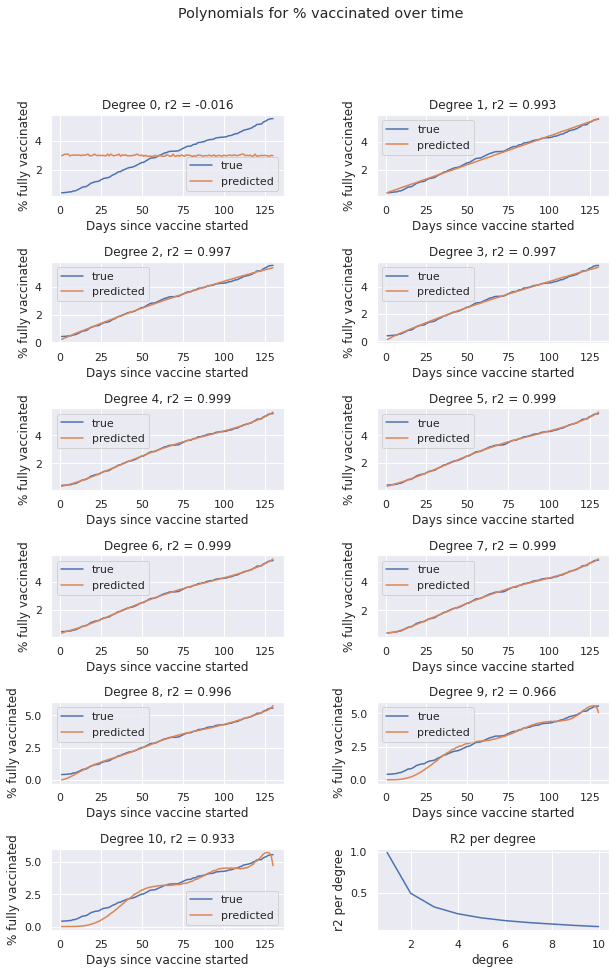

In [ ]:
# get x (days) and y (% vaccinated)
x = np.array(post_vak_df.loc[:, 'Days since start']).reshape(-1, 1)
y = np.array(post_vak_df.loc[:, 'persentase full vaksin'])

# test polynomials up to degree 10 to check for a good fit
r2_dict_list = test_poly_degrees(x, y,  xlabel = 'Days since vaccine started', 
                                 ylabel = '% fully vaccinated', 
                                 title = 'Polynomials for % vaccinated over time')

In [ ]:
# Get data for days since 6 march, % fully vaccinated, and generate 'future_x' that represents days 0-180
x = np.array(post_vak_df.loc[:, 'Days since start']).reshape(-1, 1)
y = np.array(post_vak_df.loc[:, 'persentase full vaksin'])
x_future = np.array(range(625)).reshape(-1, 1)

# fit data to 2nd degree polynomial
poly_project = PolynomialFeatures(degree=3)
x_poly = poly_project.fit_transform(x)
x_future_poly = poly_project.fit_transform(x_future)

# train a linear regression model on existing data and use it to predict future vaccine rates
reg = LinearRegression(fit_intercept=False)
reg.fit(x_poly, y)
y_pred = reg.predict(x_poly)
y_future_pred = reg.predict(x_future_poly)

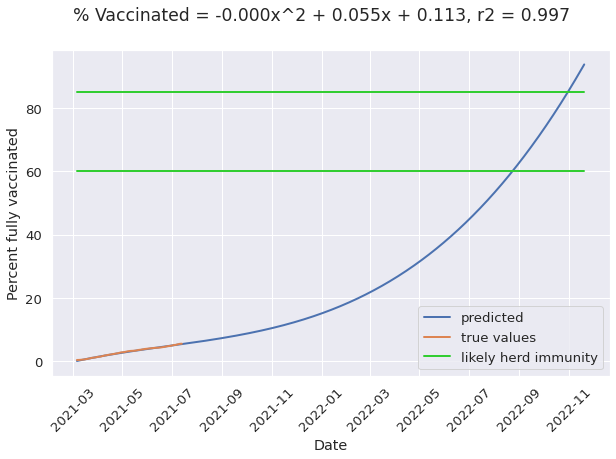

In [ ]:
from datetime import datetime, timedelta

# define herd immunity percentages
lo_herd_per = 60
hi_herd_per = 85

# Initialize a datetime for Jan 1, 2021 and a 1-day timedelta
jan_1 = datetime(month = 3, day = 6, year = 2021)
td_day = timedelta(days = 1)


# Generate a datetime range for Jan 1, 2021 - end of predicted values (200 days after Jan 1, 2021)
dt_x_future = []
for day in range(625): 
    dt_day = (day*td_day) + jan_1
    dt_x_future.append(dt_day)

sns.set(font_scale = 1.2)

# plot the predicted and true vaccination values 
plt.plot(dt_x_future, y_future_pred, linewidth = 2, label = 'predicted')
plt.plot(dt_x_future[:130], y, linewidth = 2, label = 'true values')

# get the model and r2 value
a_0 = reg.coef_[0]
a_1 = reg.coef_[1]
a_2 = reg.coef_[2]
r2 = r2_score(y_true=y, y_pred=y_pred)

# add lines marking the expected range of herd immunity (60-85%)
lo_herd = np.empty_like(dt_x_future)
lo_herd.fill(lo_herd_per)
hi_herd = np.empty_like(dt_x_future)
hi_herd.fill(hi_herd_per)
plt.plot(dt_x_future, lo_herd, linewidth = 2, color = 'limegreen', label = 'likely herd immunity')
plt.plot(dt_x_future, hi_herd, linewidth = 2, color = 'limegreen')



# format plot 
plt.legend()
plt.suptitle(f'% Vaccinated = {a_2:.3f}x^2 + {a_1:.3f}x + {a_0:.3f}, r2 = {r2:.3f}')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Percent fully vaccinated')
plt.gcf().set_size_inches(10,6)



In [ ]:
d = {'tgl':dt_x_future , 'persen': y_future_pred}
a=pd.DataFrame(d)
low=a.loc[a['persen']>60]
high=a.loc[a['persen']>85]
low_herd_immunity=low.min()
high_herd_immunity=high.min()

print("60% populasi Indonesia tervaksin secara full diprediksikan pada tanggal : ",low_herd_immunity.tgl)
print("85% populasi Indonesia tervaksin secara full diprediksikan pada tanggal : ",high_herd_immunity.tgl)

60% populasi Indonesia tervaksin secara full diprediksikan pada tanggal :  2022-08-24 00:00:00
85% populasi Indonesia tervaksin secara full diprediksikan pada tanggal :  2022-10-31 00:00:00


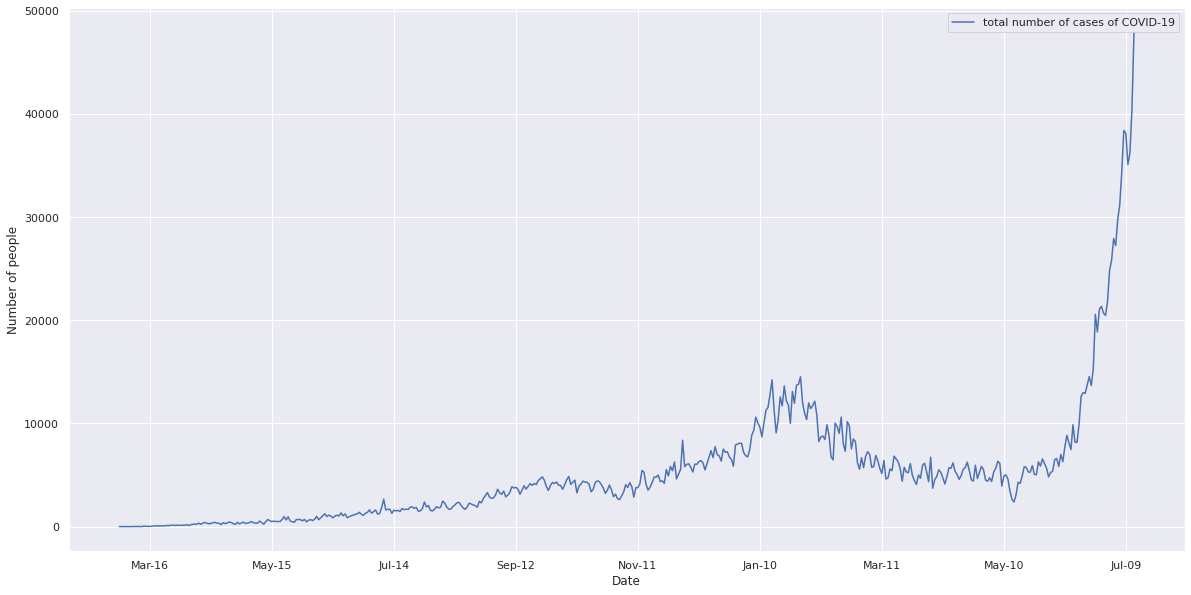

In [ ]:
sns.set()

# ploting the x and y axis 
plt.plot(df['Tanggal'], df['Positif Harian (Indonesia)'], label='total number of cases of COVID-19')


# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)

# groom graph
plt.legend()
plt.gcf().set_size_inches(20,10)
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

In [ ]:
from scipy.signal import argrelextrema

def find_covid_extrema(feat, df_covid, window = 14, selector = np.less): 
    """ Uses a rolling average to smooth the feature of interest over the given window, then finds local extrema

        Args: 
            feat (string): the name of the feature of interest 
            df (dataframe): the dataframe to pull from 
            window (int): the size of the window a rolling average should be calculated for 
            selector (string): arg for argrelextrema; usually 'less' or 'greater'
            
        Returns: 
            extrema_indices (tuple): a tuple containing the indices of local extrema for the smoothed feature
    """
    # Compute a rolling average of the values of feat over the given window and center it
    roll_avg = df_covid.loc[:,feat].rolling(window=window, center = True).mean()
    roll_avg_array = np.array(roll_avg)
    
    # Find the local extrema (default local minima) using the scipy function argrelextrema() 
    extrema_indices = argrelextrema(roll_avg_array, selector, order = 10)

    return roll_avg_array, extrema_indices

In [ ]:
# get the local minima by using a rolling average
roll_avg, local_mins_tuple = find_covid_extrema('Positif Harian (Indonesia)', df,
                                                 window = 28, selector = np.less)
local_mins = local_mins_tuple[0]

print(local_mins)


[243 401 414 432]


In [ ]:
local_mins = np.partition(local_mins, 1)[0:2]


Text(0.5, 0.98, 'Visualizing minima of COVID waves')

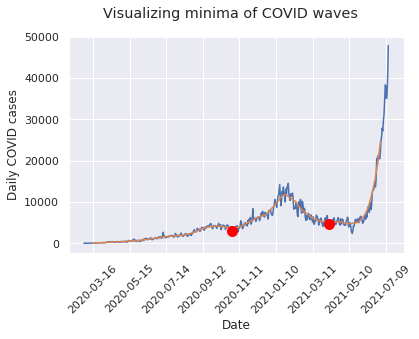

In [ ]:
# get daily case data
x = df['Tanggal']
y = df['Positif Harian (Indonesia)']

# plot daily case data after Feb 29, 2020 (testing increased)
plt.plot(x, y)
plt.plot(x, roll_avg)

# plot calculated local mins as a sanity check 
for min_index in local_mins:
    # get the x and y coordinates for each local minima
    min_x = df.iloc[min_index:min_index+1, :]['Tanggal']
    min_y = df.iloc[min_index:min_index+1, :]['Positif Harian (Indonesia)']
    
    # plot each minima
    plt.plot(min_x, min_y, color = 'red', markersize = 10, marker = 'o')
    
# groom graph
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Daily COVID cases')
plt.suptitle('Visualizing minima of COVID waves')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning:

divide by zero encountered in double_scalars



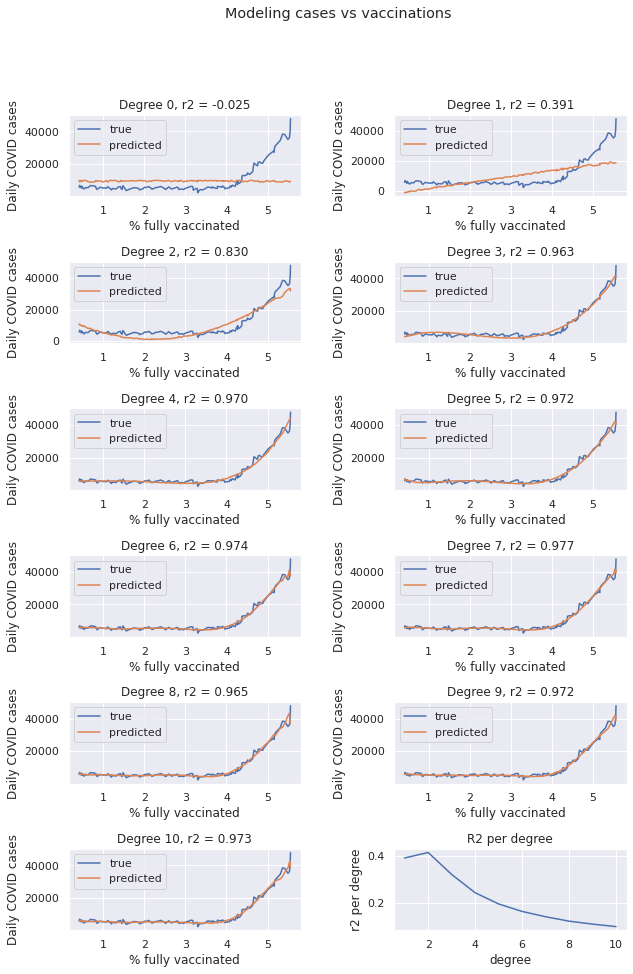

In [ ]:
# try cross-validating a second degree polynomial fit to the vaccine-case data
degree = 3

# get x (% vaccinated) and y (daily cases)
x = np.array(post_vak_df.loc[:, 'persentase full vaksin']).reshape(-1, 1)
y = np.array(post_vak_df.loc[:, 'Positif Harian (Indonesia)'])

# test polynomials up to degree 10 to check for a good fit
r2_dict_list = test_poly_degrees(x, y,  xlabel = '% fully vaccinated', 
                                 ylabel = 'Daily COVID cases', 
                                 title = 'Modeling cases vs vaccinations')

In [ ]:
# get data
x = np.array(post_vak_df.loc[:, 'persentase full vaksin']).reshape(-1, 1)
y = np.array(post_vak_df.loc[:, 'Positif Harian (Indonesia)'])

Text(0, 0.5, 'Daily COVID cases')

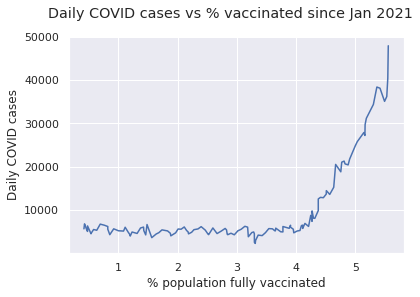

In [ ]:
# plot and groom graph
plt.plot(x, y)
plt.suptitle('Daily COVID cases vs % vaccinated since Jan 2021')
plt.xlabel('% population fully vaccinated')
plt.ylabel('Daily COVID cases')

Model: -7072.202049295325x^2 + 12051.95088190502x + 537.0075608020437
Model: -7043.74366884447x^2 + 12003.58133998126x + 514.1681805212943
Model: -6914.8895891514685x^2 + 11788.921516763272x + 520.1902953665852
Model: -7402.675900439472x^2 + 13147.02551730309x + -548.9448284985584
Model: -6832.682558837485x^2 + 11622.31717154825x + 687.5952063008555
Model: -7184.258274189099x^2 + 12437.875444697735x + 237.34202649661947
Model: -7399.418868894643x^2 + 12716.113029727774x + 201.69921944805344
Model: -7225.428328714202x^2 + 12363.085789890747x + 406.31223468790796
Model: -7232.819247073686x^2 + 12304.133974196839x + 340.11833312473243
Model: -7409.5151470420615x^2 + 13015.15844629866x + -183.76827698338164


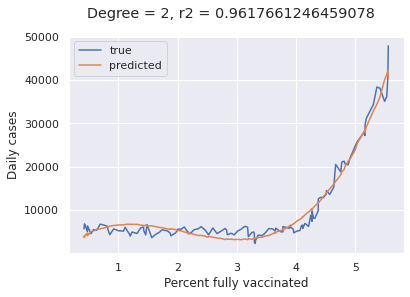

In [ ]:
# try cross-validating a second degree polynomial fit to the vaccine-case data
degree = 3

# get x (% vaccinated) and y (daily cases)
x = np.array(post_vak_df.loc[:, 'persentase full vaksin']).reshape(-1, 1)
y = np.array(post_vak_df.loc[:, 'Positif Harian (Indonesia)'])

# fit data to a second degree polynomial structure
poly_project = PolynomialFeatures(degree=degree)
x_poly = poly_project.fit_transform(x)

# initialize a k fold and linear regression
kfold = KFold(n_splits = 10, shuffle = True)
reg = LinearRegression(fit_intercept=False)

# initialize an empty array for y_pred 
y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x_poly, y): 
    # split data into train and test data
    x_poly_test = x_poly[test_idx, :]
    x_poly_train = x_poly[train_idx, :]
    y_train = y[train_idx]
        
    # fit the linear model to the training data
    reg.fit(x_poly_train, y_train)
        
    # predict y 
    y_pred[test_idx] = reg.predict(x_poly_test)
    
    # print the model 
    c = reg.coef_[0]
    b = reg.coef_[1]
    a = reg.coef_[2]
    print(f'Model: {a}x^2 + {b}x + {c}')
        
# compute the cross validated r2
r2 = r2_score(y_true=y, y_pred=y_pred)

# plot the true and predicted vaccine values
plt.plot(x, y, label = 'true')
plt.plot(x, y_pred, label = 'predicted')

# format the plot
plt.suptitle(f'Degree = 2, r2 = {r2}')
plt.xlabel('Percent fully vaccinated')
plt.ylabel('Daily cases')
plt.legend()


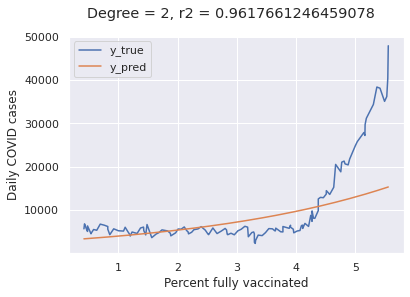

In [ ]:
# try fitting an exponential model to the vaccine/case relationship 

# get data
x = np.array(post_vak_df.loc[:, 'persentase full vaksin']).reshape(-1, 1)
y = np.array(post_vak_df.loc[:, 'Positif Harian (Indonesia)'])

# train a linear regression on the log of y
reg = LinearRegression()
reg.fit(x, np.log(y))

# predict values 
y_pred = np.exp(reg.predict(x))

# plot the exponential model against the real data
plt.plot(x, y, label = 'y_true')
plt.plot(x, y_pred, label = 'y_pred')
plt.legend()

# format the plot
plt.suptitle(f'Degree = 2, r2 = {r2}')
plt.xlabel('Percent fully vaccinated')
plt.ylabel('Daily COVID cases')
plt.legend()

Text(0, 0.5, 'Daily cases')

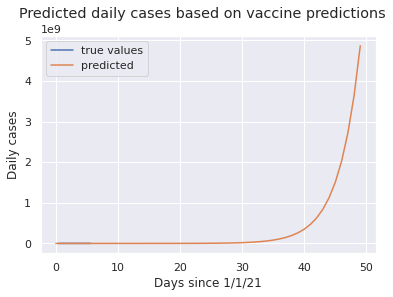

In [ ]:
# compute a non-cross-validated 2nd degree model relating vaccination rate to daily cases 
# and use it to predict vaccination rates for 180 days of 2021

x_future = np.array(range(50)).reshape(-1, 1)

# get data
x = np.array(post_vak_df.loc[:, 'persentase full vaksin']).reshape(-1, 1)
y = np.array(post_vak_df.loc[:, 'Positif Harian (Indonesia)'])

# train a linear regression on the log of y
reg = LinearRegression()
reg.fit(x, np.log(y))
y_future_pred = np.exp(reg.predict(x_future))

# plot the predicted and true vaccination values 
plt.plot(x, y, label = 'true values')
plt.plot(x_future, y_future_pred, label = 'predicted')

# get the model and r2 value
a = reg.coef_[0]

# format plot 
plt.legend()
plt.suptitle(f'Predicted daily cases based on vaccine predictions')
plt.xlabel('Days since 1/1/21')
plt.ylabel('Daily cases')
